# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Three observable trends:
# As seen from the first scatter plot Latitude vs Temperature, as Latitude increases the temperature drops. Thus
#proving that as you go away from equate temperature drops.
# There is a clear corelation between temperature and latitude, however the r squared results for humidity and cloudiness
# are not satisfactory and therefore we can conclude that there is little corelation between them.
# There is also little or no corelation between wind speed and latitude and we can confirm that wind is not latitude dependent.

In [2]:
#Import dependencies
import json
import requests
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from api_keys import weatherapi
from citipy import citipy
from pprint import pprint
from scipy.stats import linregress

#Checking sample JSON file
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "Melbourne"
units = "&units=imperial"
query_url = url + "appid=" + weatherapi + "&q=" + city + units
weather = requests.get(query_url).json()
pprint(weather)

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 28.0836, 'lon': -80.6081},
 'dt': 1615972889,
 'id': 4163971,
 'main': {'feels_like': 66.06,
          'humidity': 88,
          'pressure': 1018,
          'temp': 66.15,
          'temp_max': 70,
          'temp_min': 64.4},
 'name': 'Melbourne',
 'sys': {'country': 'US',
         'id': 4922,
         'sunrise': 1615980568,
         'sunset': 1616023918,
         'type': 1},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 213, 'gust': 10.65, 'speed': 7.67}}


## Generate Cities List

In [3]:
#Generate random longitude and latitude
from random import uniform
Lat = np.random.uniform(low=-90, high=90, size=1500)
Long = np.random.uniform(low=-180, high=180, size=1500)

#Creating dataframe
df = pd.DataFrame(Lat,columns=["Lat"])
df["Long"] = Long.tolist()

#creating loop and using citipy to get the nearest cities
cityname=[]
for index, row in df.iterrows():
    city = citipy.nearest_city(row["Lat"], row["Long"]).city_name
    cityname.append(city)

#Adding columns to dataframe
City = np.asarray(cityname)
df["City"] = City.tolist()
df["Humidity"] = ""
df["Temperature"] = ""
df["Cloudiness"]= ""
df["Wind Speed"] = ""
df["Max Temperature"] = ""
df["Country"] = ""
df["Date"] = ""
#Dropping duplicates to get only unique cities
df.drop_duplicates(subset=["City"], keep="first", inplace=True)
df

,Lat,Long,City,Humidity,Temperature,Cloudiness,Wind Speed,Max Temperature,Country,Date
0,-62.067870,-15.813720,cape town,,,,,,,
1,-29.438296,-81.333450,coquimbo,,,,,,,
2,83.159077,-104.372481,yellowknife,,,,,,,
3,38.565665,67.485329,boysun,,,,,,,
4,19.500466,-74.770693,guantanamo,,,,,,,
...,...,...,...,...,...,...,...,...,...,...
1487,7.314729,-90.472178,santa cruz,,,,,,,
1495,22.692284,-66.740772,isabela,,,,,,,
1496,12.446288,75.938556,kushalnagar,,,,,,,
1497,13.352431,105.043714,kampong thum,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Performing API calls
print("Beginning Data Retrieval")
print("------------------------------")

for index, row in df.iterrows():
    url = "http://api.openweathermap.org/data/2.5/weather?"
    city = row["City"]
    units = "&units=imperial"
    query_url = url + "appid=" + weatherapi + "&q=" + city + units
    weather = requests.get(query_url).json()
    try:
        df.loc[index,"Lat"] = weather["coord"]["lat"]
        df.loc[index,"Long"] = weather["coord"]["lon"]
        df.loc[index,"Humidity"] = weather["main"]["humidity"]
        df.loc[index,"Temperature"] = weather["main"]["temp"]
        df.loc[index, "Wind Speed"] = weather["wind"]["speed"]
        df.loc[index, "Cloudiness"] = weather["clouds"]["all"]
        df.loc[index, "Max Temperature"] = weather["main"]["temp_max"]
        df.loc[index, "Country"] = weather["sys"]["country"]
        df.loc[index, "Date"] = weather["dt"]
        print(f'Processing record for City: {weather["name"]} {weather["id"]}')
        
    except:
        print("Missing field/result... skipping.")


Beginning Data Retrieval
------------------------------
Processing record for City: Cape Town 3369157
Processing record for City: Coquimbo 3893629
Processing record for City: Yellowknife 6185377
Processing record for City: Boysun 1217734
Processing record for City: Guantánamo 3557689
Processing record for City: Nelson Bay 2155562
Processing record for City: Rikitea 4030556
Processing record for City: Ilulissat 3423146
Processing record for City: Carnarvon 2074865
Processing record for City: Quthing 932183
Processing record for City: Kieta 2094027
Missing field/result... skipping.
Processing record for City: Hermanus 3366880
Missing field/result... skipping.
Processing record for City: Coolum Beach 2170581
Processing record for City: Padang 1633419
Processing record for City: Bethel 5282297
Processing record for City: Jamestown 5122534
Processing record for City: Saint Paul Harbor 5866583
Processing record for City: Husavik 2629833
Processing record for City: Vila Franca do Campo 337247

Processing record for City: Varhaug 3132644
Processing record for City: Alofi 4036284
Missing field/result... skipping.
Processing record for City: Asău 686090
Processing record for City: Pinega 509483
Processing record for City: Hasaki 2112802
Processing record for City: Torbay 6167817
Processing record for City: Lompoc 5367788
Processing record for City: Berlevåg 780687
Processing record for City: Ulcinj 3188516
Processing record for City: Inta 1505579
Processing record for City: Tambacounda 2244991
Processing record for City: Gambēla 337405
Processing record for City: Guerrero Negro 4021858
Processing record for City: College 5859699
Missing field/result... skipping.
Processing record for City: Petropavlovsk-Kamchatskiy 2122104
Processing record for City: Harper 2276492
Processing record for City: Airai 1651810
Missing field/result... skipping.
Processing record for City: Glendive 5654391
Processing record for City: Saint-François 2980080
Processing record for City: Pemangkat 163163

Processing record for City: Abhā 110690
Processing record for City: Monrovia 2274895
Processing record for City: Ponta Delgada 3372783
Processing record for City: Bamban 1727679
Processing record for City: Yekaterinovka 468180
Processing record for City: Tuatapere 2180815
Processing record for City: Serebryanyy Bor 2016977
Processing record for City: Mosquera 3674292
Processing record for City: San Jose 5392171
Processing record for City: Värnamo 2664855
Missing field/result... skipping.
Processing record for City: Barentu 342711
Processing record for City: Mitchell 5229794
Processing record for City: Victor Harbor 2059470
Processing record for City: Salinópolis 3389822
Processing record for City: Puerto Carreño 3671519
Processing record for City: São João da Barra 3448903
Processing record for City: Ati 2436400
Processing record for City: Stutterheim 951650
Processing record for City: Iqaluit 5983720
Processing record for City: Yantal' 2055868
Processing record for City: Eldorado 3464

Processing record for City: Ziniaré 2353257
Processing record for City: Kiama 2161515
Processing record for City: Atambua 1651103
Processing record for City: Taoudenni 2450173
Processing record for City: Khani 610864
Processing record for City: Philadelphia 4560349
Missing field/result... skipping.
Processing record for City: Selaphum 1606340
Processing record for City: Wau 363885
Processing record for City: Henties Bay 3356832
Processing record for City: Barra de Tecoanapa 3516171
Processing record for City: São Domingos 3449293
Processing record for City: Monte Alegre 3394605
Processing record for City: Aitape 2101169
Processing record for City: Riyadh 108410
Processing record for City: Hwange 889942
Processing record for City: Gariāband 1271534
Processing record for City: Skibbereen 2961459
Processing record for City: Valinhos 3445578
Processing record for City: Pingxiang 1798654
Processing record for City: Mahon 2514301
Processing record for City: Parabel' 1495586
Processing record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Converting data into csv and converting the fields to numeric
df.to_csv("City1.csv", encoding="utf-8", index=False)
df.dtypes
df["Humidity"]=pd.to_numeric(df["Humidity"])
df["Temperature"]=pd.to_numeric(df["Temperature"])
df["Cloudiness"]=pd.to_numeric(df["Cloudiness"])
df["Wind Speed"]=pd.to_numeric(df["Wind Speed"])
df["Max Temperature"]=pd.to_numeric(df["Max Temperature"])
df["Date"]=pd.to_datetime(df['Date'])
df

,Lat,Long,City,Humidity,Temperature,Cloudiness,Wind Speed,Max Temperature,Country,Date
0,-33.925800,18.423200,cape town,50.0,75.38,0.0,8.05,75.99,ZA,1970-01-01 00:00:01.615972902
1,-29.953300,-71.343600,coquimbo,72.0,57.20,0.0,2.30,57.20,CL,1970-01-01 00:00:01.615973177
2,62.456000,-114.352500,yellowknife,85.0,5.00,90.0,8.05,5.00,CA,1970-01-01 00:00:01.615973041
3,38.206100,67.198600,boysun,40.0,54.23,11.0,5.26,54.23,UZ,1970-01-01 00:00:01.615973177
4,20.144400,-75.209200,guantanamo,78.0,69.40,75.0,6.91,69.80,CU,1970-01-01 00:00:01.615973177
...,...,...,...,...,...,...,...,...,...,...
1487,-17.800000,-63.166700,santa cruz,94.0,75.20,75.0,10.36,75.20,BO,1970-01-01 00:00:01.615973320
1495,6.708500,121.971100,isabela,79.0,84.20,40.0,8.05,84.20,PH,1970-01-01 00:00:01.615973320
1496,12.458000,75.959000,kushalnagar,16.0,92.95,87.0,9.40,92.95,IN,1970-01-01 00:00:01.615973321
1497,12.711100,104.888700,kampong thum,30.0,97.61,95.0,3.20,97.61,KH,1970-01-01 00:00:01.615973321


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humiditydf = df.loc[df["Humidity"] > 100]
humiditydf
#no cities with more than 100% humidity

,Lat,Long,City,Humidity,Temperature,Cloudiness,Wind Speed,Max Temperature,Country,Date


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

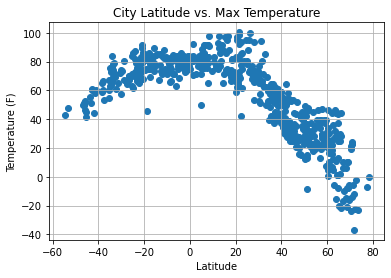

In [9]:
temp = df.Temperature
lat = df.Lat
plt.scatter(lat,temp)
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Max Temperature")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

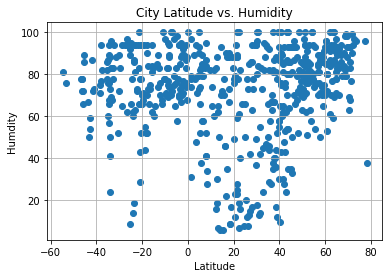

In [10]:
humid = df.Humidity
lat = df.Lat
plt.scatter(lat,humid)
plt.ylabel("Humdity")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Humidity")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

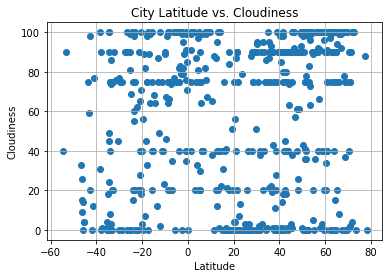

In [11]:
cloud = df.Cloudiness
lat = df.Lat
plt.scatter(lat,cloud)
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Cloudiness")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

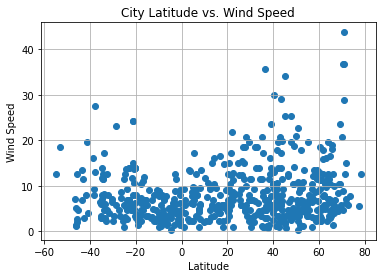

In [12]:
plt.scatter(df.iloc[:,0], df.iloc[:,6])
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Wind Speed")
plt.grid()
plt.show()

## Linear Regression

In [13]:
#Splitting the data into Southern and Northern hemisphere
northdf = df[(df.Lat >= 0)]
northdf
southdf = df[(df.Lat <= 0)]
northdf

,Lat,Long,City,Humidity,Temperature,Cloudiness,Wind Speed,Max Temperature,Country,Date
2,62.456000,-114.352500,yellowknife,85.0,5.00,90.0,8.05,5.00,CA,1970-01-01 00:00:01.615973041
3,38.206100,67.198600,boysun,40.0,54.23,11.0,5.26,54.23,UZ,1970-01-01 00:00:01.615973177
4,20.144400,-75.209200,guantanamo,78.0,69.40,75.0,6.91,69.80,CU,1970-01-01 00:00:01.615973177
8,69.216700,-51.100000,ilulissat,79.0,10.40,75.0,10.36,10.40,GL,1970-01-01 00:00:01.615973178
14,28.705829,75.472232,siwani,NaN,NaN,NaN,NaN,NaN,,NaT
...,...,...,...,...,...,...,...,...,...,...
1483,39.925600,9.657200,tortoli,30.0,55.40,0.0,4.61,55.40,IT,1970-01-01 00:00:01.615973320
1486,30.153000,-85.569900,callaway,100.0,70.59,90.0,11.50,71.01,US,1970-01-01 00:00:01.615973320
1495,6.708500,121.971100,isabela,79.0,84.20,40.0,8.05,84.20,PH,1970-01-01 00:00:01.615973320
1496,12.458000,75.959000,kushalnagar,16.0,92.95,87.0,9.40,92.95,IN,1970-01-01 00:00:01.615973321


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7764251655021539


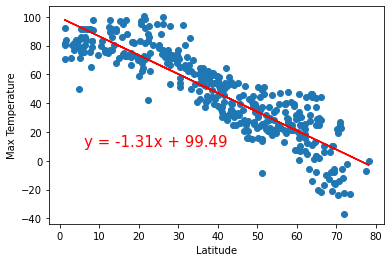

In [14]:
northdf = northdf[northdf["Max Temperature"].notnull()]
x_value = northdf.Lat
y_value = northdf.iloc[:,7]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4425254254205696


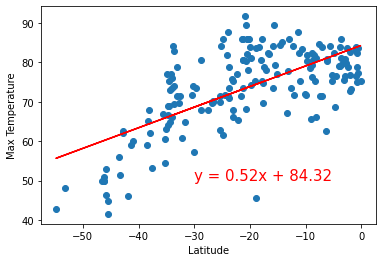

In [15]:
southdf = southdf[southdf["Max Temperature"].notnull()]
x_value = southdf.Lat
y_value = southdf.iloc[:,7]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11273822618693645


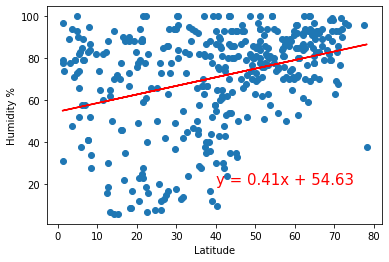

In [16]:
northdf = northdf[northdf["Humidity"].notnull()]
x_value = northdf.Lat
y_value = northdf.Humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0261577908981084


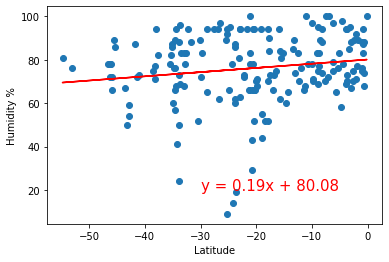

In [17]:
southdf = southdf[southdf["Humidity"].notnull()]
x_value = southdf.Lat
y_value = southdf.Humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03456419671588316


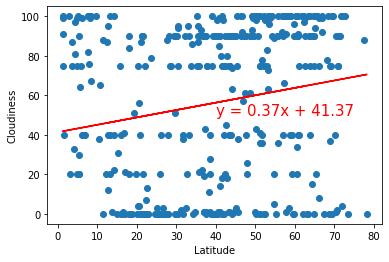

In [18]:
northdff = northdf[northdf["Cloudiness"].notnull()]
y_value = northdf.Cloudiness
x_value = northdf.Lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(40,50),fontsize=15,color="red")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12032031219063462


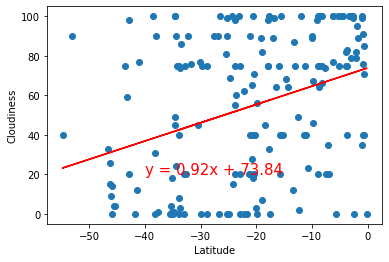

In [19]:
southdf = southdf[southdf["Cloudiness"].notnull()]
y_value = southdf.Cloudiness
x_value = southdf.Lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0158560548749186


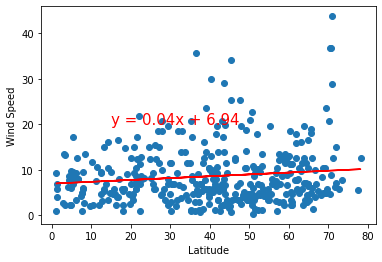

In [20]:
northdf = northdf[northdf["Wind Speed"].notnull()]
y_value = northdf.iloc[:,6]
x_value = northdf.Lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(15,20),fontsize=15,color="red")
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0955041391749803


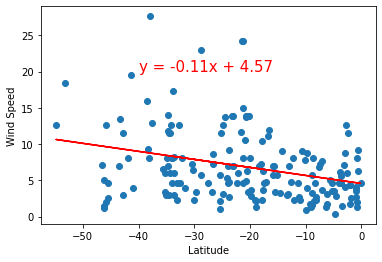

In [21]:
southdf = southdf[southdf["Wind Speed"].notnull()]
y_value = southdf.iloc[:,6]
x_value = southdf.Lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()